In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dense, MaxPooling2D, Dropout, Flatten

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def load_data():
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    return train_df, test_df

In [5]:
train_df, test_df = load_data()

In [6]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(train_df.shape)
print(test_df.shape)

(42000, 785)
(28000, 784)


In [8]:
X=train_df.iloc[:,1:].values
y=train_df.iloc[:,0].values
training_images, valid_images, training_labels, valid_labels = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
testing_images=test_df.values

In [45]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                              rotation_range=10, 
                                              width_shift_range=0.1, 
                                              height_shift_range=0.1,
                                              shear_range=0.1,
                                              zoom_range=0.1)
valid_datagen = ImageDataGenerator(rescale=1/255)

In [46]:
# Reshape
training_images = training_images.reshape(29400,28,28,1)
valid_images = valid_images.reshape(12600,28,28,1)
testing_images =testing_images.reshape(28000,28,28,1)

In [47]:
train_gen = train_datagen.flow(training_images, training_labels, batch_size=64)
valid_gen = valid_datagen.flow(valid_images, valid_labels, batch_size=64)

In [48]:
# Create Model
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit_generator(train_gen, epochs=25, validation_data=valid_gen)

Epoch 1/25
460/460 [==============================] - 33s 72ms/step - loss: 0.5652 - accuracy: 0.8160 - val_loss: 0.1222 - val_accuracy: 0.9621
Epoch 2/25
460/460 [==============================] - 32s 70ms/step - loss: 0.1999 - accuracy: 0.9377 - val_loss: 0.1065 - val_accuracy: 0.9687
Epoch 3/25
460/460 [==============================] - 33s 71ms/step - loss: 0.1478 - accuracy: 0.9539 - val_loss: 0.0764 - val_accuracy: 0.9748
Epoch 4/25
460/460 [==============================] - 32s 70ms/step - loss: 0.1186 - accuracy: 0.9637 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 5/25
460/460 [==============================] - 34s 73ms/step - loss: 0.0989 - accuracy: 0.9681 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 6/25
460/460 [==============================] - 36s 79ms/step - loss: 0.0920 - accuracy: 0.9709 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 7/25
460/460 [==============================] - 32s 69ms/step - loss: 0.0816 - accuracy: 0.9747 - val_loss: 0.0528 - val_accuracy:

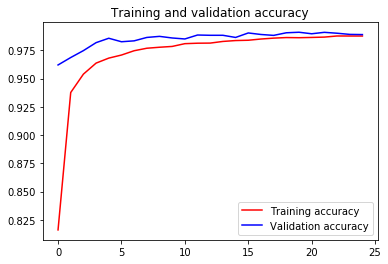

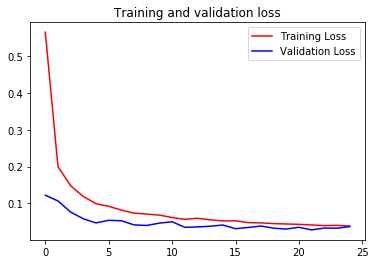

In [51]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Prediction

In [18]:
testing_images = testing_images/255

In [19]:
prediction = model.predict_classes(testing_images)

In [20]:
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [21]:
submission = pd.DataFrame()
submission['ImageId'] = range(1,28001)
submission['Label'] = prediction

In [22]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [24]:
submission.to_csv('submission.csv', index=False)